In [143]:
from sklearn.metrics import *
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as st
import matplotlib.pyplot as plt

In [144]:
X, y = make_moons(n_samples=1_0000,noise=0.05,random_state=42)
xtrain, xtest, ytrain, ytest = train_test_split(X,y,random_state=42,test_size=0.2)

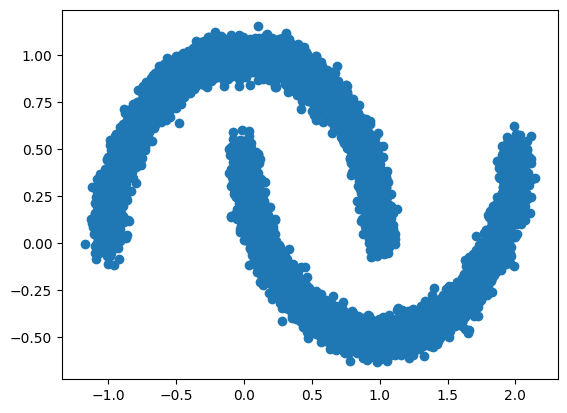

In [145]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [146]:
dscan = DBSCAN(eps=0.05,min_samples=5)
dscan.fit(X)

DBSCAN(eps=0.05)

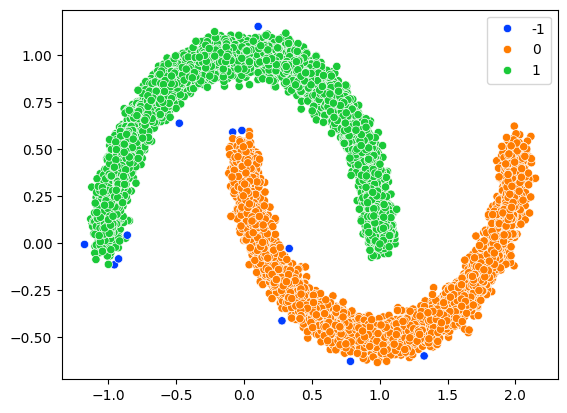

In [147]:
palette = st.color_palette(palette='bright',n_colors=len(np.unique(dscan.labels_)))
st.scatterplot(x=X[:,0],y=X[:,1],hue=dscan.labels_,palette=palette)
plt.legend(bbox_to_anchor=(1,1,0,0))
plt.show()

In [148]:
dscan = DBSCAN(eps=0.2,min_samples=5)
dscan.fit(xtrain)

DBSCAN(eps=0.2)

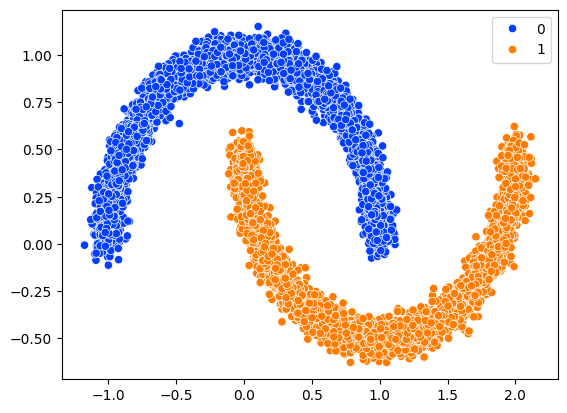

In [149]:
palette = st.color_palette(palette='bright',n_colors=len(np.unique(dscan.labels_)))
st.scatterplot(x=xtrain[:,0],y=xtrain[:,1],hue=dscan.labels_,palette=palette)
plt.legend(bbox_to_anchor=(1,1,0,0))
plt.show()

In [150]:
from sklearn.neighbors import KNeighborsClassifier

In [151]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dscan.components_,dscan.labels_[dscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [152]:
pred  = knn.predict(xtest)

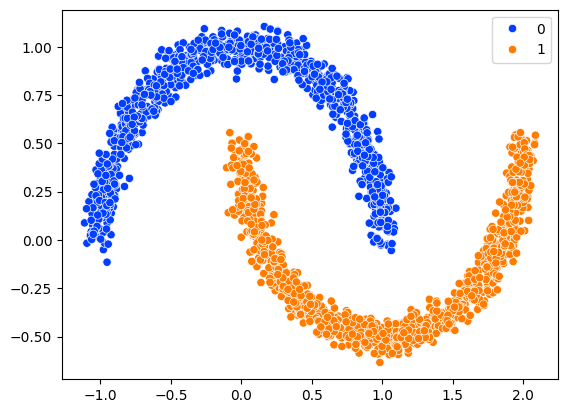

In [153]:
palette = st.color_palette(palette='bright',n_colors=len(np.unique(pred)))
st.scatterplot(x=xtest[:,0],y=xtest[:,1],hue=pred,palette=palette)
plt.legend(bbox_to_anchor=(1,1,0,0))
plt.show()

In [157]:
accuracy_score(ytest,pred)

1.0